# Random Forrests for Exploration of DEAP Dataset
Fingerprinting with OMA modes has worked really well. What about in tabular format?

Fingerprinting is good, try Quads

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [3]:
from fastai.tabular import *

In [4]:
path=pathlib.Path('/home/tris/Documents/EEG_data/DMD_DEAP')
path

PosixPath('/home/tris/Documents/EEG_data/DMD_DEAP')

In [8]:
path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s01.dat'
df_read = pickle.load(open(path, 'rb'), encoding='latin1')
labels=df_read['labels']
df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
df=df_tmp
for n in range (2,10):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s0'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True)
for n in range (10,33):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True) 

In [9]:
df=df.div(9) #normalize
df.head()

,valence,arousal,dominance,liking
0,0.856667,0.844444,0.766667,0.870000
1,0.900000,0.812222,0.808889,0.941111
2,0.953333,0.837778,1.000000,0.786667
3,0.548889,0.667778,0.680000,0.895556
4,0.773333,0.435556,0.798889,0.672222


In [10]:
df=df.loc[df.index.repeat(4)].reset_index(drop=True)

In [11]:
df.tail()

,valence,arousal,dominance,liking
5115,0.443333,0.796667,0.538889,0.111111
5116,0.794444,0.447778,1.000000,0.208889
5117,0.794444,0.447778,1.000000,0.208889
5118,0.794444,0.447778,1.000000,0.208889
5119,0.794444,0.447778,1.000000,0.208889


In [14]:
filenames=[]
subject_labels=[]
for n in range (0,9):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,160):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
for n in range (9,32):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,160):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)

In [15]:
df['file_name']=filenames
df['subject_label']=subject_labels
df=df[['file_name','subject_label','valence','arousal']]
df.tail()

,file_name,subject_label,valence,arousal
5115,S32T156,32,0.443333,0.796667
5116,S32T157,32,0.794444,0.447778
5117,S32T158,32,0.794444,0.447778
5118,S32T159,32,0.794444,0.447778
5119,S32T160,32,0.794444,0.447778


In [49]:
df.loc[(df['valence'] >= 0.5) & (df['arousal'] >= 0.5), 'emotion_quad'] = 'HVHA'
df.loc[(df['valence'] <= 0.5) & (df['arousal'] >= 0.5), 'emotion_quad'] = 'LVHA'
df.loc[(df['valence'] <= 0.5) & (df['arousal'] <= 0.5), 'emotion_quad'] = 'LVLA'  
df.loc[(df['valence'] >= 0.5) & (df['arousal'] <= 0.5), 'emotion_quad'] = 'HVLA'
df.head()

,file_name,subject_label,valence,arousal,emotion_quad
0,S1T1,1,0.856667,0.844444,HVHA
1,S1T2,1,0.856667,0.844444,HVHA
2,S1T3,1,0.856667,0.844444,HVHA
3,S1T4,1,0.856667,0.844444,HVHA
4,S1T5,1,0.900000,0.812222,HVHA


In [50]:
df=df.reset_index(drop=True); df

,file_name,subject_label,valence,arousal,emotion_quad
0,S1T1,1,0.856667,0.844444,HVHA
1,S1T2,1,0.856667,0.844444,HVHA
2,S1T3,1,0.856667,0.844444,HVHA
3,S1T4,1,0.856667,0.844444,HVHA
4,S1T5,1,0.900000,0.812222,HVHA
...,...,...,...,...,...
5115,S32T156,32,0.443333,0.796667,LVHA
5116,S32T157,32,0.794444,0.447778,HVLA
5117,S32T158,32,0.794444,0.447778,HVLA
5118,S32T159,32,0.794444,0.447778,HVLA


In [51]:
path=pathlib.Path('/media/tris/tris_files/EEG_datasets/OMA/window')
path

PosixPath('/media/tris/tris_files/EEG_datasets/OMA/window')

In [52]:
df.to_csv(path/'labels_proc_window.csv', index=False)

In [53]:
df = pd.read_csv(path/'labels_proc_window.csv') #load labels
df.tail()

,file_name,subject_label,valence,arousal,emotion_quad
5115,S32T156,32,0.443333,0.796667,LVHA
5116,S32T157,32,0.794444,0.447778,HVLA
5117,S32T158,32,0.794444,0.447778,HVLA
5118,S32T159,32,0.794444,0.447778,HVLA
5119,S32T160,32,0.794444,0.447778,HVLA


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff2c89fdd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7eff2dd63810>]], dtype=object)

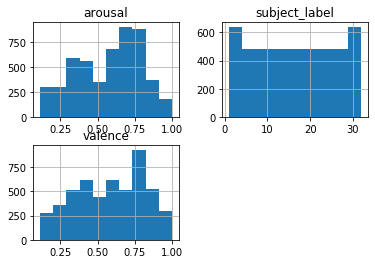

In [54]:
df.hist()

In [55]:
PATH = "/media/tris/tris_files/EEG_datasets/OMA/window"

In [56]:
df_raw = pd.read_csv('/media/tris/tris_files/EEG_datasets/OMA/window/OMA_deap_window_head.csv')
df_raw

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
0,1,1,0.081948,-0.045425,-0.015341,-0.076406,0.171911,0.138256,-0.036334,-0.163510,...,-0.051060,-0.077595,-0.035316,0.044253,-0.011422,0.032761,0.036446,0.093352,0.019047,45.343738
1,1,2,0.049658,0.009936,0.017493,-0.036572,0.046062,0.030815,-0.004333,-0.053269,...,-0.313788,-0.102129,0.234990,0.556034,-0.339402,-0.340453,-0.097615,0.110119,0.011303,41.336668
2,1,3,0.168706,-0.067328,0.087951,-0.029108,0.285195,0.090563,-0.165873,-0.376551,...,0.178666,-0.025014,-0.349329,-0.488738,0.337106,0.338119,0.184487,-0.002215,0.019710,40.198276
3,1,4,-0.195931,0.064528,-0.073303,0.056689,-0.257539,-0.099162,0.151166,0.382519,...,0.200335,-0.001949,-0.208238,-0.534020,0.417333,0.369180,0.162184,-0.209589,0.009616,48.866446
4,1,5,-0.122429,0.024698,0.052268,0.085952,-0.197063,-0.162514,0.035680,0.108430,...,-0.178251,-0.066832,0.178333,0.325097,-0.204320,-0.241421,-0.034872,0.097101,0.006341,47.811462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,32,156,-0.357643,-0.491085,0.209572,-0.171950,0.338017,0.007259,0.585254,0.222424,...,0.130738,0.157728,-0.073260,0.035155,-0.099400,-0.010219,-0.206379,-0.079857,0.014983,30.739507
5116,32,157,-0.358014,-0.582069,0.212574,-0.247489,0.437359,0.003154,0.714734,0.266580,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.682687
5117,32,158,-0.379006,-0.487530,0.214247,-0.157777,0.327218,0.016778,0.575243,0.213227,...,-0.015303,-0.231798,0.010316,-0.188196,0.253593,-0.023508,0.315596,0.116271,0.032695,26.565669
5118,32,159,0.111528,0.150362,-0.060776,0.045534,-0.100818,-0.012377,-0.170067,-0.047020,...,0.194464,0.271677,-0.133987,0.107742,-0.205606,0.007676,-0.341775,-0.160257,0.007078,27.228309


In [97]:
emotion_quad = df['emotion_quad']
valence = df['valence']
df_learn = df_raw.join(emotion_quad)
df_learn = df_raw.join(valence)
df_learn.head()

ValueError: columns overlap but no suffix specified: Index(['emotion_quad'], dtype='object')

In [58]:
df_learn.iloc[[40],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7,emotion_quad
40,1,41,0.039184,0.058918,-0.065916,-0.123054,0.146321,0.102099,0.081156,-0.021269,...,-0.036511,0.167833,0.226212,-0.148387,-0.210056,-0.299728,-0.136652,0.008732,45.824037,LVLA


In [59]:
os.makedirs('tmp', exist_ok=True)
df_learn.to_feather('tmp/eeg-raw')

In [60]:
import pandas as pd
df_raw = pd.read_feather('tmp/eeg-raw') #lol raw sashimis and sushis
df_raw.head()

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7,emotion_quad
0,1,1,0.081948,-0.045425,-0.015341,-0.076406,0.171911,0.138256,-0.036334,-0.163510,...,-0.077595,-0.035316,0.044253,-0.011422,0.032761,0.036446,0.093352,0.019047,45.343738,HVHA
1,1,2,0.049658,0.009936,0.017493,-0.036572,0.046062,0.030815,-0.004333,-0.053269,...,-0.102129,0.234990,0.556034,-0.339402,-0.340453,-0.097615,0.110119,0.011303,41.336668,HVHA
2,1,3,0.168706,-0.067328,0.087951,-0.029108,0.285195,0.090563,-0.165873,-0.376551,...,-0.025014,-0.349329,-0.488738,0.337106,0.338119,0.184487,-0.002215,0.019710,40.198276,HVHA
3,1,4,-0.195931,0.064528,-0.073303,0.056689,-0.257539,-0.099162,0.151166,0.382519,...,-0.001949,-0.208238,-0.534020,0.417333,0.369180,0.162184,-0.209589,0.009616,48.866446,HVHA
4,1,5,-0.122429,0.024698,0.052268,0.085952,-0.197063,-0.162514,0.035680,0.108430,...,-0.066832,0.178333,0.325097,-0.204320,-0.241421,-0.034872,0.097101,0.006341,47.811462,HVHA


In [61]:
df_raw.iloc[[100],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7,emotion_quad
100,1,101,0.295503,0.263211,-0.36884,-0.054941,0.174653,0.174065,-0.052186,-0.331137,...,-0.000796,0.111426,0.104641,-0.112401,-0.103564,0.01163,0.13046,0.002736,49.569047,HVHA


Text(0.5, 1.0, 'zeta6')

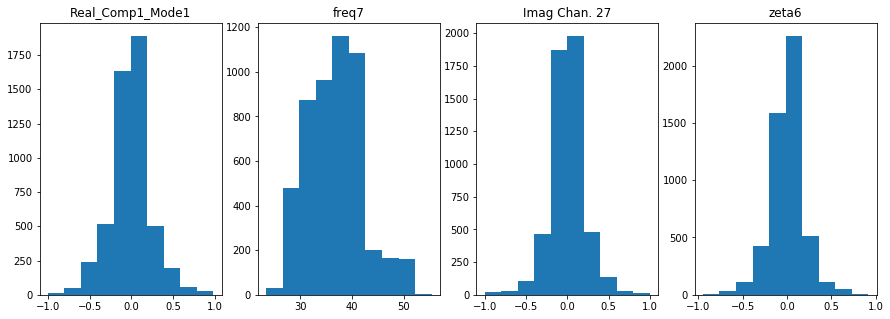

In [62]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].hist(df_raw.Real_Comp1_Mode1)
axs[0].set_title('Real_Comp1_Mode1')
axs[1].hist(df_raw.fn7)
axs[1].set_title('freq7')
axs[2].hist(df_raw.Imag_Comp1_Mode3)
axs[2].set_title('Imag Chan. 27')
axs[3].hist(df_raw.zeta6)
axs[3].set_title('zeta6')

In [63]:
valid_idx=np.random.randint(low=0, high=len(df_raw), size=1024) #size is 0.2*totalobersvations

In [64]:
dep_var= 'emotion_quad'

In [65]:
path = "/media/tris/tris_files/EEG_datasets/DMD/tabular"

In [66]:
data = TabularDataBunch.from_df(path, df_raw, dep_var, valid_idx=valid_idx)

In [67]:
data.show_batch()

Imag_Comp8_Mode6,Imag_Comp11_Mode4,Imag_Comp22_Mode1,Real_Comp29_Mode5,Real_Comp24_Mode5,Imag_Comp16_Mode2,Imag_Comp7_Mode2,Imag_Comp11_Mode6,Imag_Comp32_Mode1,Imag_Comp19_Mode4,Real_Comp12_Mode7,Real_Comp17_Mode1,zeta7,Real_Comp27_Mode7,Real_Comp17_Mode6,Imag_Comp22_Mode5,Real_Comp29_Mode4,Real_Comp24_Mode6,Imag_Comp30_Mode6,Imag_Comp27_Mode6,Imag_Comp32_Mode2,Imag_Comp5_Mode4,Imag_Comp21_Mode7,Imag_Comp31_Mode2,Real_Comp26_Mode3,Imag_Comp22_Mode2,Imag_Comp5_Mode1,Imag_Comp13_Mode6,Imag_Comp23_Mode2,Imag_Comp1_Mode2,Real_Comp5_Mode2,Real_Comp29_Mode7,Real_Comp14_Mode4,Real_Comp7_Mode5,Real_Comp23_Mode5,Real_Comp19_Mode4,Real_Comp9_Mode6,Real_Comp31_Mode3,Real_Comp19_Mode6,Imag_Comp26_Mode4,Real_Comp8_Mode7,Real_Comp26_Mode2,Imag_Comp31_Mode7,Real_Comp28_Mode1,Imag_Comp9_Mode4,Imag_Comp26_Mode2,Real_Comp6_Mode1,Imag_Comp3_Mode2,Real_Comp7_Mode6,Real_Comp25_Mode5,Imag_Comp32_Mode5,Real_Comp22_Mode1,Real_Comp19_Mode1,Imag_Comp14_Mode6,Imag_Comp12_Mode4,Imag_Comp12_Mode2,Real_Comp7_Mode3,Real_Comp4_Mode6,Imag_Comp6_Mode3,Imag_Comp8_Mode3,Imag_Comp19_Mode6,Imag_Comp21_Mode3,Imag_Comp11_Mode5,Imag_Comp15_Mode1,Real_Comp28_Mode7,Real_Comp23_Mode1,Real_Comp25_Mode2,Imag_Comp13_Mode2,Imag_Comp13_Mode4,Real_Comp15_Mode1,Real_Comp23_Mode7,Imag_Comp25_Mode4,Imag_Comp26_Mode7,Real_Comp3_Mode2,Imag_Comp6_Mode6,Real_Comp18_Mode6,zeta6,Imag_Comp9_Mode7,Imag_Comp26_Mode3,Real_Comp22_Mode6,Imag_Comp27_Mode3,Real_Comp24_Mode3,Imag_Comp28_Mode7,Imag_Comp30_Mode3,Real_Comp21_Mode6,Real_Comp24_Mode7,Imag_Comp22_Mode6,Real_Comp20_Mode3,Imag_Comp3_Mode5,Real_Comp9_Mode1,Real_Comp15_Mode3,Real_Comp18_Mode3,Imag_Comp8_Mode1,Real_Comp23_Mode3,Real_Comp15_Mode5,Real_Comp31_Mode7,Real_Comp23_Mode2,Real_Comp18_Mode7,Real_Comp24_Mode4,Real_Comp30_Mode2,Real_Comp31_Mode6,Real_Comp27_Mode3,Real_Comp20_Mode6,Imag_Comp24_Mode5,Imag_Comp28_Mode3,Imag_Comp9_Mode2,Imag_Comp29_Mode6,Real_Comp4_Mode2,Real_Comp4_Mode5,Imag_Comp14_Mode5,Imag_Comp23_Mode4,Imag_Comp23_Mode5,Imag_Comp15_Mode3,Real_Comp27_Mode5,Real_Comp7_Mode1,Real_Comp29_Mode3,Imag_Comp4_Mode6,Imag_Comp23_Mode7,fn1,Imag_Comp27_Mode5,Imag_Comp25_Mode1,Imag_Comp12_Mode6,Imag_Comp1_Mode7,Real_Comp21_Mode3,Real_Comp13_Mode3,Real_Comp9_Mode7,Imag_Comp25_Mode7,Real_Comp11_Mode3,Imag_Comp17_Mode4,Real_Comp27_Mode4,Real_Comp11_Mode1,Imag_Comp17_Mode5,Real_Comp8_Mode2,Real_Comp18_Mode2,Imag_Comp28_Mode5,Imag_Comp16_Mode7,Trial,Imag_Comp14_Mode3,Imag_Comp1_Mode5,Imag_Comp19_Mode2,Real_Comp1_Mode1,Imag_Comp1_Mode1,Imag_Comp28_Mode4,Real_Comp3_Mode5,Real_Comp26_Mode5,Imag_Comp28_Mode1,Real_Comp16_Mode1,Real_Comp12_Mode3,Imag_Comp8_Mode7,Real_Comp7_Mode2,Real_Comp17_Mode7,Imag_Comp24_Mode7,Imag_Comp27_Mode7,Real_Comp31_Mode4,Imag_Comp11_Mode7,Imag_Comp20_Mode4,Imag_Comp6_Mode5,Real_Comp1_Mode2,Real_Comp24_Mode2,Real_Comp20_Mode7,Imag_Comp12_Mode3,Imag_Comp26_Mode6,Real_Comp2_Mode7,Imag_Comp5_Mode3,Imag_Comp11_Mode3,fn6,Imag_Comp4_Mode3,Imag_Comp1_Mode4,Real_Comp6_Mode7,Real_Comp12_Mode5,Real_Comp25_Mode7,Real_Comp2_Mode2,Real_Comp30_Mode3,Imag_Comp6_Mode7,Imag_Comp31_Mode5,Real_Comp8_Mode3,Imag_Comp24_Mode1,Imag_Comp30_Mode2,Real_Comp31_Mode5,Imag_Comp28_Mode2,Real_Comp27_Mode2,Real_Comp22_Mode3,Imag_Comp29_Mode3,Imag_Comp20_Mode7,Real_Comp11_Mode5,Real_Comp20_Mode2,Real_Comp11_Mode4,Real_Comp15_Mode4,Imag_Comp18_Mode4,Imag_Comp21_Mode1,Real_Comp16_Mode5,Real_Comp14_Mode3,zeta1,Imag_Comp13_Mode7,Real_Comp10_Mode3,Imag_Comp4_Mode1,Imag_Comp14_Mode2,Real_Comp8_Mode1,fn4,Imag_Comp19_Mode7,Real_Comp13_Mode5,fn3,Real_Comp19_Mode2,Imag_Comp7_Mode7,Imag_Comp11_Mode2,Imag_Comp10_Mode4,Imag_Comp2_Mode2,Real_Comp5_Mode6,Real_Comp6_Mode3,Imag_Comp5_Mode5,Real_Comp8_Mode6,Imag_Comp18_Mode3,Imag_Comp14_Mode7,Real_Comp28_Mode5,Real_Comp6_Mode6,Real_Comp29_Mode1,Real_Comp1_Mode6,Imag_Comp24_Mode4,Real_Comp3_Mode1,Real_Comp12_Mode6,Imag_Comp29_Mode2,Real_Comp15_Mode6,Imag_Comp31_Mode4,Imag_Comp8_Mode2,Real_Comp23_Mode6,Imag_Comp16_Mode5,Real_Comp26_Mode6,Real_Comp6_Mode4,Real_Comp22_Mode2,Real_Comp4_Mode4,Real_Comp5_Mode1,Real_Com

In [21]:
# max_log_y = np.log(np.max(df_raw['Subject'])*1.2)
# y_range = torch.tensor([0, max_log_y])

In [77]:
learn = tabular_learner(data, layers=[2000,100], ps=[0.001,0.01], emb_drop=0.04, metrics=accuracy)

In [78]:
??tabular_learner

In [69]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(464, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=464, out_features=10000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(10000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=False)
    (4): Linear(in_features=10000, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01, inplace=False)
    (8): Linear(in_features=100, out_features=4, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


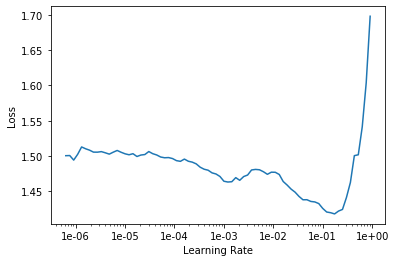

In [79]:
learn.lr_find()
learn.recorder.plot()

In [81]:
lr=1e-1
learn.fit_one_cycle(5, slice(lr), wd=0.4)

epoch,train_loss,valid_loss,accuracy,time
0,1.155259,1.303495,0.460938,00:00
1,1.208399,1.235101,0.456055,00:00
2,1.204933,1.230092,0.467773,00:00
3,1.173972,1.201648,0.467773,00:00
4,1.150773,1.180614,0.469727,00:00


In [92]:
learn.fit_one_cycle(5, slice(lr), wd=0.3)

epoch,train_loss,valid_loss,accuracy,time
0,1.169058,1.545107,0.440430,00:00
1,1.224993,1.393094,0.406250,00:00
2,1.212232,1.335725,0.371094,00:00
3,1.190970,1.188344,0.464844,00:00
4,1.152410,1.174955,0.469727,00:00


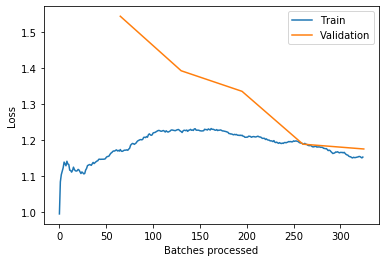

In [93]:
learn.recorder.plot_losses()

In [94]:
learn.show_results()

Imag_Comp8_Mode6,Imag_Comp11_Mode4,Imag_Comp22_Mode1,Real_Comp29_Mode5,Real_Comp24_Mode5,Imag_Comp16_Mode2,Imag_Comp7_Mode2,Imag_Comp11_Mode6,Imag_Comp32_Mode1,Imag_Comp19_Mode4,Real_Comp12_Mode7,Real_Comp17_Mode1,zeta7,Real_Comp27_Mode7,Real_Comp17_Mode6,Imag_Comp22_Mode5,Real_Comp29_Mode4,Real_Comp24_Mode6,Imag_Comp30_Mode6,Imag_Comp27_Mode6,Imag_Comp32_Mode2,Imag_Comp5_Mode4,Imag_Comp21_Mode7,Imag_Comp31_Mode2,Real_Comp26_Mode3,Imag_Comp22_Mode2,Imag_Comp5_Mode1,Imag_Comp13_Mode6,Imag_Comp23_Mode2,Imag_Comp1_Mode2,Real_Comp5_Mode2,Real_Comp29_Mode7,Real_Comp14_Mode4,Real_Comp7_Mode5,Real_Comp23_Mode5,Real_Comp19_Mode4,Real_Comp9_Mode6,Real_Comp31_Mode3,Real_Comp19_Mode6,Imag_Comp26_Mode4,Real_Comp8_Mode7,Real_Comp26_Mode2,Imag_Comp31_Mode7,Real_Comp28_Mode1,Imag_Comp9_Mode4,Imag_Comp26_Mode2,Real_Comp6_Mode1,Imag_Comp3_Mode2,Real_Comp7_Mode6,Real_Comp25_Mode5,Imag_Comp32_Mode5,Real_Comp22_Mode1,Real_Comp19_Mode1,Imag_Comp14_Mode6,Imag_Comp12_Mode4,Imag_Comp12_Mode2,Real_Comp7_Mode3,Real_Comp4_Mode6,Imag_Comp6_Mode3,Imag_Comp8_Mode3,Imag_Comp19_Mode6,Imag_Comp21_Mode3,Imag_Comp11_Mode5,Imag_Comp15_Mode1,Real_Comp28_Mode7,Real_Comp23_Mode1,Real_Comp25_Mode2,Imag_Comp13_Mode2,Imag_Comp13_Mode4,Real_Comp15_Mode1,Real_Comp23_Mode7,Imag_Comp25_Mode4,Imag_Comp26_Mode7,Real_Comp3_Mode2,Imag_Comp6_Mode6,Real_Comp18_Mode6,zeta6,Imag_Comp9_Mode7,Imag_Comp26_Mode3,Real_Comp22_Mode6,Imag_Comp27_Mode3,Real_Comp24_Mode3,Imag_Comp28_Mode7,Imag_Comp30_Mode3,Real_Comp21_Mode6,Real_Comp24_Mode7,Imag_Comp22_Mode6,Real_Comp20_Mode3,Imag_Comp3_Mode5,Real_Comp9_Mode1,Real_Comp15_Mode3,Real_Comp18_Mode3,Imag_Comp8_Mode1,Real_Comp23_Mode3,Real_Comp15_Mode5,Real_Comp31_Mode7,Real_Comp23_Mode2,Real_Comp18_Mode7,Real_Comp24_Mode4,Real_Comp30_Mode2,Real_Comp31_Mode6,Real_Comp27_Mode3,Real_Comp20_Mode6,Imag_Comp24_Mode5,Imag_Comp28_Mode3,Imag_Comp9_Mode2,Imag_Comp29_Mode6,Real_Comp4_Mode2,Real_Comp4_Mode5,Imag_Comp14_Mode5,Imag_Comp23_Mode4,Imag_Comp23_Mode5,Imag_Comp15_Mode3,Real_Comp27_Mode5,Real_Comp7_Mode1,Real_Comp29_Mode3,Imag_Comp4_Mode6,Imag_Comp23_Mode7,fn1,Imag_Comp27_Mode5,Imag_Comp25_Mode1,Imag_Comp12_Mode6,Imag_Comp1_Mode7,Real_Comp21_Mode3,Real_Comp13_Mode3,Real_Comp9_Mode7,Imag_Comp25_Mode7,Real_Comp11_Mode3,Imag_Comp17_Mode4,Real_Comp27_Mode4,Real_Comp11_Mode1,Imag_Comp17_Mode5,Real_Comp8_Mode2,Real_Comp18_Mode2,Imag_Comp28_Mode5,Imag_Comp16_Mode7,Trial,Imag_Comp14_Mode3,Imag_Comp1_Mode5,Imag_Comp19_Mode2,Real_Comp1_Mode1,Imag_Comp1_Mode1,Imag_Comp28_Mode4,Real_Comp3_Mode5,Real_Comp26_Mode5,Imag_Comp28_Mode1,Real_Comp16_Mode1,Real_Comp12_Mode3,Imag_Comp8_Mode7,Real_Comp7_Mode2,Real_Comp17_Mode7,Imag_Comp24_Mode7,Imag_Comp27_Mode7,Real_Comp31_Mode4,Imag_Comp11_Mode7,Imag_Comp20_Mode4,Imag_Comp6_Mode5,Real_Comp1_Mode2,Real_Comp24_Mode2,Real_Comp20_Mode7,Imag_Comp12_Mode3,Imag_Comp26_Mode6,Real_Comp2_Mode7,Imag_Comp5_Mode3,Imag_Comp11_Mode3,fn6,Imag_Comp4_Mode3,Imag_Comp1_Mode4,Real_Comp6_Mode7,Real_Comp12_Mode5,Real_Comp25_Mode7,Real_Comp2_Mode2,Real_Comp30_Mode3,Imag_Comp6_Mode7,Imag_Comp31_Mode5,Real_Comp8_Mode3,Imag_Comp24_Mode1,Imag_Comp30_Mode2,Real_Comp31_Mode5,Imag_Comp28_Mode2,Real_Comp27_Mode2,Real_Comp22_Mode3,Imag_Comp29_Mode3,Imag_Comp20_Mode7,Real_Comp11_Mode5,Real_Comp20_Mode2,Real_Comp11_Mode4,Real_Comp15_Mode4,Imag_Comp18_Mode4,Imag_Comp21_Mode1,Real_Comp16_Mode5,Real_Comp14_Mode3,zeta1,Imag_Comp13_Mode7,Real_Comp10_Mode3,Imag_Comp4_Mode1,Imag_Comp14_Mode2,Real_Comp8_Mode1,fn4,Imag_Comp19_Mode7,Real_Comp13_Mode5,fn3,Real_Comp19_Mode2,Imag_Comp7_Mode7,Imag_Comp11_Mode2,Imag_Comp10_Mode4,Imag_Comp2_Mode2,Real_Comp5_Mode6,Real_Comp6_Mode3,Imag_Comp5_Mode5,Real_Comp8_Mode6,Imag_Comp18_Mode3,Imag_Comp14_Mode7,Real_Comp28_Mode5,Real_Comp6_Mode6,Real_Comp29_Mode1,Real_Comp1_Mode6,Imag_Comp24_Mode4,Real_Comp3_Mode1,Real_Comp12_Mode6,Imag_Comp29_Mode2,Real_Comp15_Mode6,Imag_Comp31_Mode4,Imag_Comp8_Mode2,Real_Comp23_Mode6,Imag_Comp16_Mode5,Real_Comp26_Mode6,Real_Comp6_Mode4,Real_Comp22_Mode2,Real_Comp4_Mode4,Real_Comp5_Mode1,Real_Com

In [95]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)

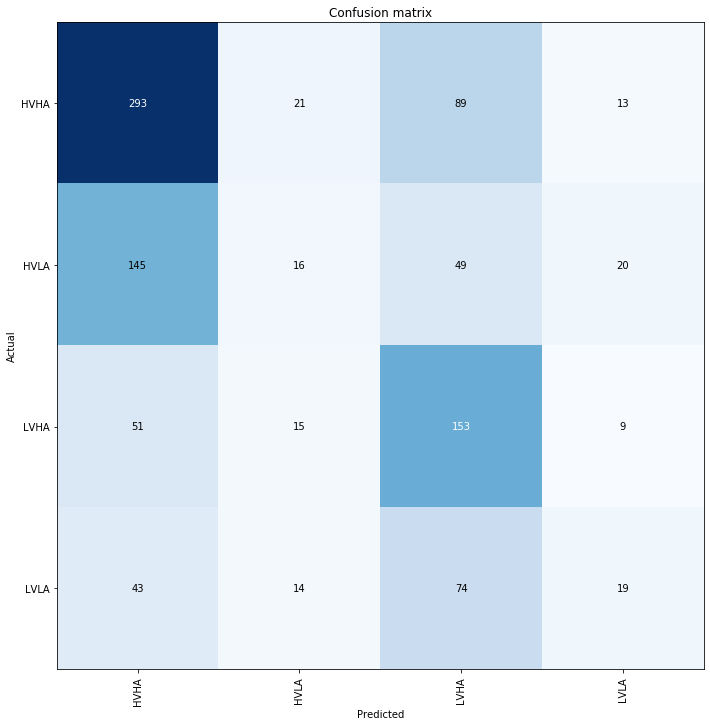

In [96]:
interp.plot_confusion_matrix(figsize=(10,10))